#### Numerical prediction for surface tension $\gamma$

To solve density profile with same incompressibility constraint,

\begin{align*}
f	&=c_{s}^{2}\left(\rho^{\sigma}\ln\rho^{\sigma}+\rho^{\sigma^{\prime}}\ln\rho^{\sigma^{\prime}}\right)+G_{\sigma\sigma^{\prime}}c_{s}^{2}\rho^{\sigma}\rho^{\sigma^{\prime}}-\frac{1}{2}G_{\sigma\sigma^{\prime}}c_{s}^{4}\frac{\partial\rho^{\sigma}}{\partial z}\frac{\partial\rho^{\sigma^{\prime}}}{\partial z} \\
	&=c_{s}^{2}\left[\rho^{\sigma}\ln\rho^{\sigma}+\left(\rho_{t}-\rho^{\sigma}\right)\ln\left(\rho_{t}-\rho^{\sigma}\right)\right]+G_{\sigma\sigma^{\prime}}c_{s}^{2}\rho^{\sigma}\left(\rho_{t}-\rho^{\sigma}\right)+\frac{1}{2}G_{\sigma\sigma^{\prime}}c_{s}^{4}\left(\frac{\partial\rho^{\sigma}}{\partial z}\right)^{2}
\end{align*}

$$c_{s}^{2}\left(\ln\rho^{\sigma}+1-\ln\left(\rho_{t}-\rho^{\sigma}\right)-1\right)+G_{\sigma\sigma^{\prime}}c_{s}^{2}\left(\rho_{t}-2\rho^{\sigma}\right)-G_{\sigma\sigma^{\prime}}c_{s}^{4}\frac{\partial^{2}\rho^{\sigma}}{\partial z^{2}}=0 $$

$$\text{or }\ \ G_{\sigma\sigma^{\prime}}c_{s}^{2}\frac{\partial^{2}\rho^{\sigma}}{\partial z^{2}}=\ln\frac{\rho^{\sigma}}{\rho_{t}-\rho^{\sigma}}-2G_{\sigma\sigma^{\prime}}\rho^{\sigma}+G_{\sigma\sigma^{\prime}}\rho_{t}$$

$$y_{1}=\frac{d\rho}{dz},\ \ y_{2}=\frac{dy_{1}}{dz}=\frac{1}{G_{\sigma\sigma^{\prime}}c_{s}^{2}}\ln\frac{\rho^{\sigma}}{\rho_{t}-\rho^{\sigma}}-\frac{2}{c_{s}^{2}}\rho^{\sigma}+\frac{1}{c_{s}^{2}}\rho_{t}$$

with the B.C.

$$\rho^{\sigma}\Big|_{z=-\infty}=\rho_{0},\ \ \rho^{\sigma}\Big|_{z=\infty}=\rho_{1},\ \ \ \rho_{0}+\rho_{1}=\rho_{t}$$

Bulk density solution:

$$\frac{df_b}{d\rho^\sigma}=\ln\rho^{\sigma}-\ln\left(\rho_{t}-\rho^{\sigma}\right)+G_{\sigma\sigma^{\prime}}\left(\rho_{t}-2\rho^{\sigma}\right)=0$$

or
$$\ln\frac{\rho^{\sigma}}{\rho_{t}-\rho^{\sigma}}+G_{\sigma\sigma^{\prime}}\left(\rho_{t}-2\rho^{\sigma}\right)=0$$

Then we solve $\rho_0$, $\rho_1$ from above equation.

Residue: 0.0 -3.552713678800501e-15
Bulk densities: 0.03231825314438495 3.067681746855615


/tmp/ipykernel_2171251/468948370.py:13: RuntimeWarning: divide by zero encountered in log
  fb = lambda rho_a: cs2 * (rho_a * np.log(rho_a) + (rho_t-rho_a)*np.log(rho_t-rho_a)) + G * cs2 * rho_a * (rho_t - rho_a)
/tmp/ipykernel_2171251/468948370.py:13: RuntimeWarning: invalid value encountered in multiply
  fb = lambda rho_a: cs2 * (rho_a * np.log(rho_a) + (rho_t-rho_a)*np.log(rho_t-rho_a)) + G * cs2 * rho_a * (rho_t - rho_a)


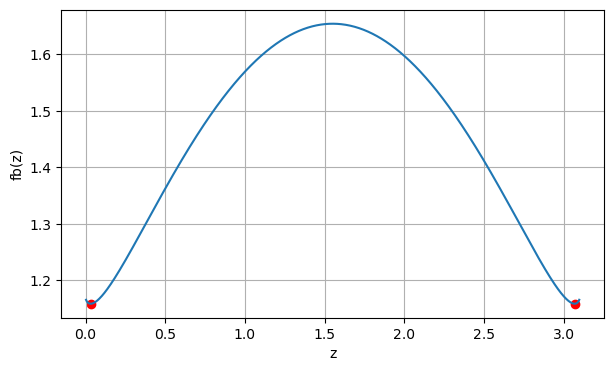

In [83]:
import numpy as np
import scipy.optimize
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

cs2 = 1/3
G = 1.5 #2.88
rho_t = 3.1 #0.7
rho_a0_guess = 0.02 #0.26
rho_a1_guess = rho_t - rho_a0_guess

# free energy density & its derivative
fb = lambda rho_a: cs2 * (rho_a * np.log(rho_a) + (rho_t-rho_a)*np.log(rho_t-rho_a)) + G * cs2 * rho_a * (rho_t - rho_a)
df = lambda rho_a: np.log(rho_a/(rho_t-rho_a)) + G*(rho_t-2*rho_a)

def bulk_free_energy_density(rho_t=0.7, G=2.88):
    rho_a_0 = scipy.optimize.fsolve(df, [rho_a0_guess, rho_a1_guess], xtol=1e-12, maxfev=10000)
    return rho_a_0

rhoa0, rhoa1 = bulk_free_energy_density()
print("Residue:", df(rhoa0), df(rhoa1))
print("Bulk densities:", rhoa0, rhoa1)

rho_a = np.linspace(0.00, rho_t, 1000)

plt.figure(figsize=(7,4))
plt.plot(rho_a, fb(rho_a))
plt.scatter([rhoa0, rhoa1], [fb(rhoa0), fb(rhoa1)], color='red')
plt.xlabel("z")
plt.ylabel("fb(z)")
plt.grid(True)
plt.show()

In [84]:
def free_energy(rho_a, rho_t=0.7, G=2.88):
    rho_a_0 = scipy.optimize.fsolve(df, [rho_a0_guess, rho_a1_guess], xtol=1e-12, maxfev=10000)
    return fb(rho_a) - fb(rho_a_0[0]), rho_a_0

print("Free energy difference at rhoa0:", free_energy(rhoa0)[0])


Free energy difference at rhoa0: 0.0


$$\gamma=2\int_{-\infty}^{\infty}\Delta f\frac{dz}{d\rho^{\sigma}}d\rho^{\sigma}=2\int_{\rho_{0}}^{\rho_{1}}\frac{\Delta f}{\sqrt{\frac{2\Delta f}{G_{\sigma\sigma^{\prime}}c_{s}^{4}}}}d\rho^{\sigma}=\sqrt{2G_{\sigma\sigma^{\prime}}}c_{s}^{2}\int_{\rho_{0}}^{\rho_{1}}\sqrt{\Delta f}d\rho^{\sigma}$$


Spinodal plot G~ rho

smooth interface + larger system -> 64

In [85]:
def surface_tension(rho_t=0.7, G=2.88):
    rho_a = np.linspace(-0.99,0.99,101)
    _, rho_a_0 = free_energy(rho_a, rho_t, G)
    # print(df(rho_a_0[0]), df(rho_a_0[1]))
    rho_a = np.linspace(rho_a_0[0], rho_t - rho_a_0[0], 101)
    f, _ = free_energy(rho_a, rho_t, G)
    f = np.where(f<0,0,f)
    sigma = scipy.integrate.trapezoid(cs2*np.sqrt(2*G*f), rho_a)
    #alpha = np.diff(rho_a_0)/np.sqrt(2*f[50]/kappa)
    return sigma

print("Surface tension:", surface_tension(rho_t, G))

Surface tension: 0.9032199309615522


/tmp/ipykernel_2171251/468948370.py:13: RuntimeWarning: invalid value encountered in log
  fb = lambda rho_a: cs2 * (rho_a * np.log(rho_a) + (rho_t-rho_a)*np.log(rho_t-rho_a)) + G * cs2 * rho_a * (rho_t - rho_a)


$$A=\frac{1}{G_{\sigma\sigma^{\prime}}c_{s}^{2}},\ \ B=-\frac{2}{c_{s}^{2}},\ \ s_{0}=\frac{\rho_{t}}{c_{s}^{2}}$$

Params are: A = 2.0 B = -6.0 s0 = 9.3
1


/tmp/ipykernel_2171251/1779624482.py:19: RuntimeWarning: invalid value encountered in log
  A*np.log(rho/(rho_t-rho)) + B*rho + s0


Success: True
Message: The algorithm converged to the desired accuracy.


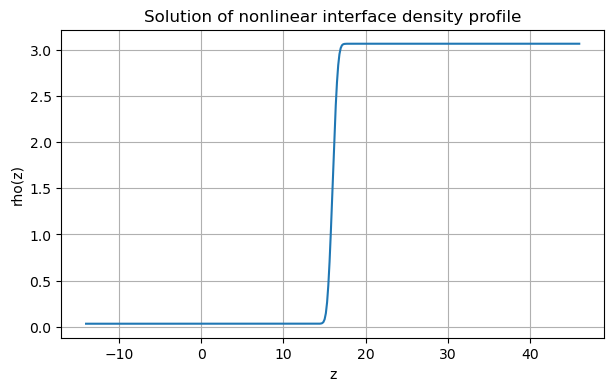

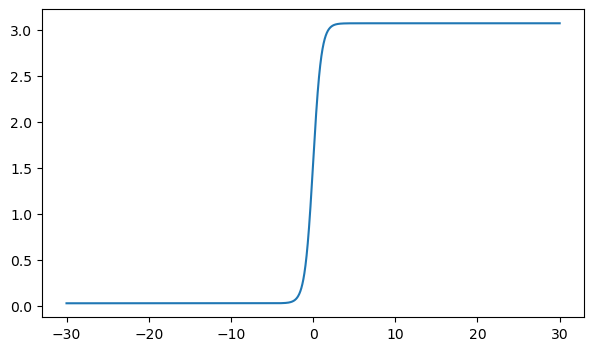

In [86]:

# Parameters
cs2 = 1/3
G = 1.5 #2.88
rho_t = 3.1 #0.7

A = 1/(G*cs2)           
B = -2/cs2     
s0 = rho_t/cs2

print("Params are: A =", A, "B =", B, "s0 =", s0)

# ODE system:
# y[0] = rho
# y[1] = rho'
def ode(z, y):
    rho = np.maximum(y[0], 1e-6)  # avoid log(0)
    return np.vstack((
        y[1],
        A*np.log(rho/(rho_t-rho)) + B*rho + s0      
    ))

# Boundary conditions:
def bc(ya, yb):
    return np.array([
        ya[0] - rhoa0,        
        yb[0] - rhoa1
    ])

# Domain
L = 30
z = np.linspace(-L, L, 20000)

# Initial guess
width = 1
print(width)
y_guess = np.zeros((2, z.size))
y_guess[0] = rhoa0 + (rhoa1 - rhoa0) * (1 + np.tanh(z/width)) / 2  # smooth guess
y_guess[1] = (rhoa1 - rhoa0) * (1 - np.tanh(z/width)**2) / (2 * width)  # derivative of the guess

# Solve BVP
sol = solve_bvp(ode, bc, z, y_guess, max_nodes=50000)

print("Success:", sol.success)
print("Message:", sol.message)

# Plot solution
z_plot = np.linspace(-L, L, 400)
rho_plot = sol.sol(z_plot)[0]

plt.figure(figsize=(7,4))
plt.plot(z_plot+16, rho_plot)
plt.xlabel("z")
plt.ylabel("rho(z)")
plt.title("Solution of nonlinear interface density profile")
plt.grid(True)
plt.show()

plt.figure(figsize=(7,4))
plt.plot(z, y_guess[0])


In [81]:
import yt

def read_frame_densities(file_path):
    ts = yt.load(file_path)
    print(ts.field_list)
    profile_data = ts.covering_grid(
        level=0, left_edge=ts.domain_left_edge, dims=ts.domain_dimensions
    )
    profile1 = profile_data['boxlib', 'rho']
    profile2 = profile_data['boxlib', 'phi']
    # grid lattice length
    box  = ts.domain_dimensions
    L = ts.domain_right_edge - ts.domain_left_edge
    dr = L/box
    return profile1, profile2, L, box, dr

# Parameters
alpha0 = 1.5 #2.05 #1.3 #1.5 #0.5 #1.5
temperature = 0  #1e-5 #2e-6 #0. #1e-5
nx, ny, nz = 8, 256, 64
rho_lo = 0.0
rho_hi = 1. #0.7 #3.0
step1 = 0
step2 = 3000 #10000

#data_root = "./critical_param_test_no_pseudo"
data_root = "."
data_dir = data_root + "/data_interface_alpha0_{:.2f}/lbm_data_shshan_alpha0_{:.2f}_xi_{:.1e}_size{:d}-{:d}-{:d}".format(alpha0, alpha0, temperature, nx, ny, nz)

#read the last frame data
frame_file = data_dir + "/plt{:07d}".format(step2)
rhoA, rhoB, L, box, dr = read_frame_densities(frame_file)

print(rhoA.shape)


yt : [INFO     ] 2025-12-16 18:51:05,262 Parameters: current_time              = 3000.0
yt : [INFO     ] 2025-12-16 18:51:05,263 Parameters: domain_dimensions         = [  8 256  64]
yt : [INFO     ] 2025-12-16 18:51:05,263 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-12-16 18:51:05,263 Parameters: domain_right_edge         = [1. 1. 1.]


[('boxlib', 'afx'), ('boxlib', 'afy'), ('boxlib', 'afz'), ('boxlib', 'agx'), ('boxlib', 'agy'), ('boxlib', 'agz'), ('boxlib', 'nfbarx'), ('boxlib', 'ngbarx'), ('boxlib', 'p_bulk'), ('boxlib', 'phi'), ('boxlib', 'rho'), ('boxlib', 'ubx'), ('boxlib', 'uby'), ('boxlib', 'ubz'), ('boxlib', 'ufbarx'), ('boxlib', 'ufx'), ('boxlib', 'ufy'), ('boxlib', 'ufz'), ('boxlib', 'ugbarx'), ('boxlib', 'ugx'), ('boxlib', 'ugy'), ('boxlib', 'ugz')]
(8, 256, 64)


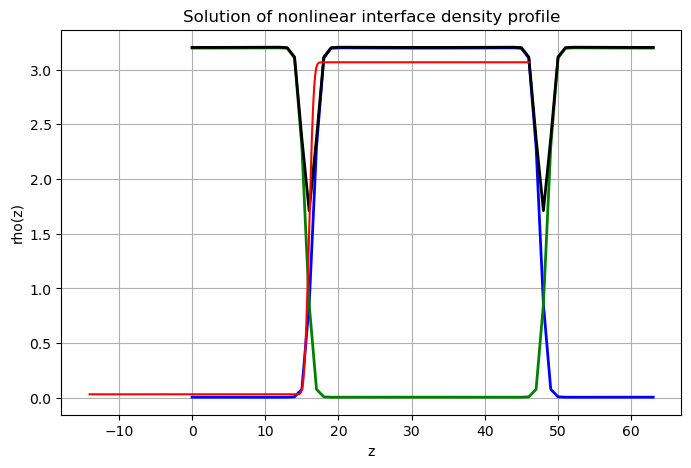

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# Assume rhoA has shape (8, 256, 64)
# Average over axis=0 (8) and axis=1 (256) → result shape (64,)
rho_z_A = np.mean(rhoA, axis=(0, 1))
rho_z_B = np.mean(rhoB, axis=(0, 1))
rho_t = rho_z_A + rho_z_B
# z coordinates (optional)
z = np.arange(box[2])  # or use physical coordinates if you have dz

plt.figure(figsize=(8, 5))
plt.plot(z, rho_z_A, 'b-', linewidth=2)
plt.plot(z, rho_z_B, 'g-', linewidth=2)
plt.plot(z, rho_t, 'k-', linewidth=2)
plt.xlabel('z')
plt.ylabel(r'$\rho(z)$')
plt.title('Density profile averaged over all components and y-direction')
plt.grid(True)

plt.plot(z_plot+16, rho_plot, 'r-')
plt.xlabel("z")
plt.ylabel("rho(z)")
plt.title("Solution of nonlinear interface density profile")
plt.grid(True)
plt.show()